In [1]:
# Install required libraries
!pip install yfinance requests beautifulsoup4 pandas matplotlib

# Import libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

Question 1

In [3]:
# Question 1: Extract Tesla Stock Data
# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data with period set to "max"
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Save the dataframe to a CSV file (optional, but recommended)
tesla_data.to_csv("tesla_data.csv", index=False)

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2

In [4]:
# Question 2: Web Scraping Tesla Revenue Data
# URL for Tesla revenue data (using MacroTrends as an example)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla-motors/revenue"
# Send a request to the website
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")
# Find the table containing revenue data (inspect the website to find the correct table)
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break
# Extract data into a dataframe
data = []
rows = revenue_table.find_all("tr")[1:]  # Skip header row
for row in rows:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace("$", "").replace(",", "")  # Clean revenue
    if revenue:  # Only add rows with revenue data
        data.append([date, int(revenue)])
# Create dataframe
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
# Display the last five rows
tesla_revenue.tail()

,Date,Revenue
57,2010-09-30,31
58,2010-06-30,28
59,2010-03-31,21
60,2009-09-30,46
61,2009-06-30,27


Question 3

In [5]:
# Question 3: Extract GameStop Stock Data
# Create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract historical stock data with period set to "max"
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Save the dataframe to a CSV file (optional)
gme_data.to_csv("gme_data.csv", index=False)

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4

In [6]:
# Question 4: Web Scraping GameStop Revenue Data
# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
# Send a request to the website
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")
# Find the table containing revenue data
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break
# Extract data into a dataframe
data = []
rows = revenue_table.find_all("tr")[1:]  # Skip header row
for row in rows:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace("$", "").replace(",", "")
    if revenue:
        data.append([date, int(revenue)])
# Create dataframe
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
# Display the last five rows
gme_revenue.tail()

,Date,Revenue
60,2010-01-31,3524
61,2009-10-31,1835
62,2009-07-31,1739
63,2009-04-30,1981
64,2009-01-31,3492


Question 5

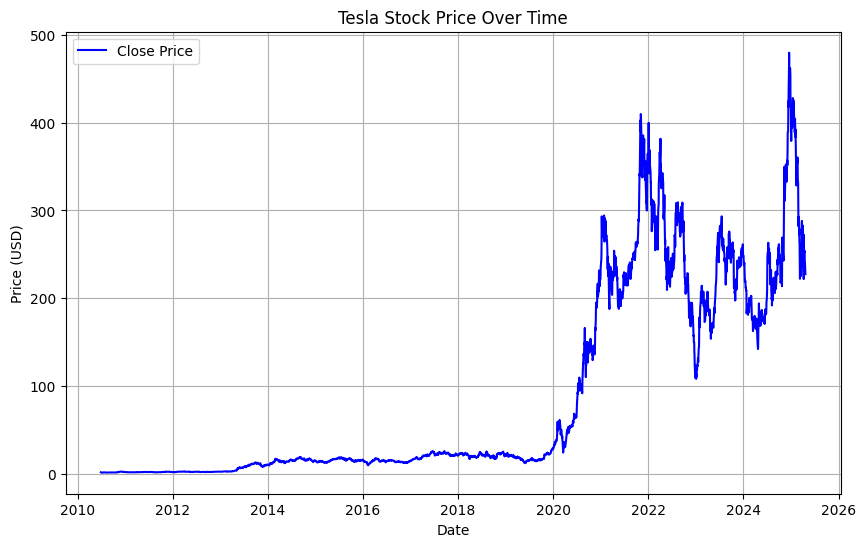

In [7]:
# Question 5: Plot Tesla Stock Graph
# Plot the Tesla stock data using make_graph
make_graph(tesla_data, "Tesla Stock Price Over Time")

Question 6

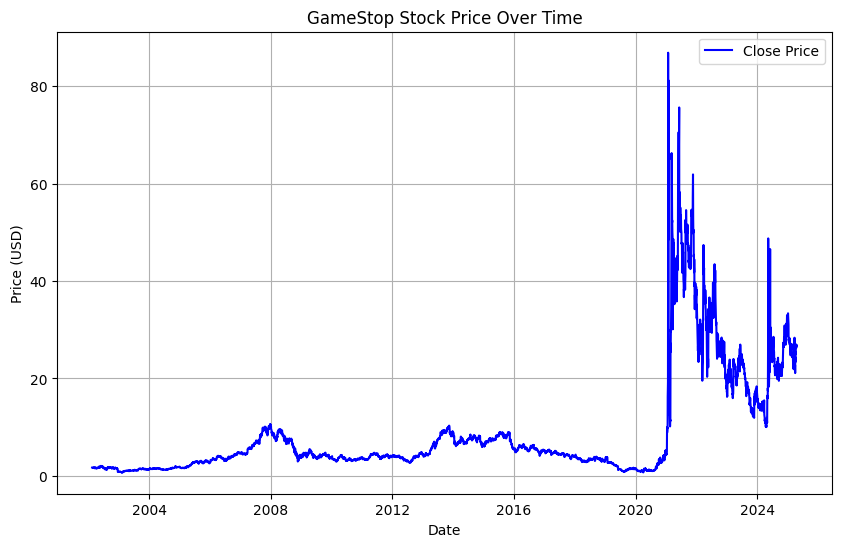

In [8]:
# Question 6: Plot GameStop Stock Graph
# Plot the GameStop stock data using make_graph
make_graph(gme_data, "GameStop Stock Price Over Time")